## Lecture 4 - Pre-made Deep Neural Network Estimators in TF ##
In this Lecture, We are going to use deep learning to predict if a student is accepted or not accepted using a pre-made estimator named "DNNClassifier"

In [1]:
import tensorflow as tf

# Plot drawing library
import matplotlib.pyplot as plt

# Make plots usable in notebook
%matplotlib inline

/Users/cihan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Prepare data ###
We will have 2 features that will be used for model. Let's assume they are math and english scores for a student. We have 40 data points.

In [6]:
data = [[35, 40],[43, 30],[38, 31],[40, 40],[30, 50],[40, 60],[30, 50],[20, 60],[50, 50],[43, 50],
        [35, 40],[43, 30],[31, 21],[40, 60],[30, 50],[40, 60],[27, 67],[45, 54],[34, 43],[43, 40],
        [85, 90],[83, 80],[78, 91],[60, 90],[75, 85],[78, 80],[98, 80],[90, 60],[93, 83],[73, 93],
        [82, 94],[93, 62],[69, 75],[80, 60],[70, 90],[90, 60],[97, 67],[65, 84],[74, 95],[98, 83]]
labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### Let's see our data on a plot ###
We created a plot using Matplotlib. As you see, the green dots are the students who are accepted. Our classifier will detect if a new student is accepted or not.

[]

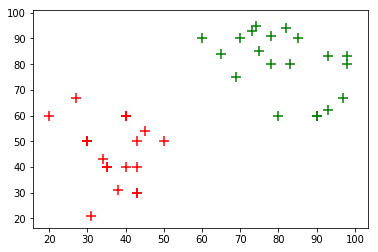

In [11]:
for i in range(len(data)):
    if labels[i] == 1:
        plt.scatter(data[i][0], data[i][1], s=120, marker='+', linewidths=2, color='green')
    else:
        plt.scatter(data[i][0], data[i][1], s=120, marker='+', linewidths=2, color='red')
plt.plot()

### Prepare input function ###
As we learned from Lecture 3, this function will run while running training function and put the data into the training process.

In [12]:
def input_func():
    global data 
    global labels
    mathArray, englishArray = [], []
    for data_point in data:
        mathArray.append(data_point[0])
        englishArray.append(data_point[1])
    feature_dict = {"math_score": mathArray, "english_score": englishArray}
    return feature_dict, labels

### Create Feature Columns ### 

In [13]:
student_feature_columns = [tf.feature_column.numeric_column("math_score"), 
                           tf.feature_column.numeric_column("english_score")]

### Create an Deep Neural Network Estimator ###
- We will use 2 hidden layers with 8 nodes. 
- We have two classes: "Accepted" or "Not Accepted"

In [14]:
DNNEstimator = tf.estimator.DNNClassifier(feature_columns=student_feature_columns,
                                          hidden_units=[8, 8],
                                          n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/_7/c28_8vl522n4nj1h8x0r4m300000gn/T/tmpkr09dbt3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181fed3780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the DNN Classification Estimator ###

In [15]:
DNNEstimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_7/c28_8vl522n4nj1h8x0r4m300000gn/T/tmpkr09dbt3/model.ckpt.
INFO:tensorflow:loss = 91.86572, step = 1
INFO:tensorflow:global_step/sec: 561.097
INFO:tensorflow:loss = 16.958586, step = 101 (0.179 sec)
INFO:tensorflow:global_step/sec: 1082.74
INFO:tensorflow:loss = 13.834175, step = 201 (0.093 sec)
INFO:tensorflow:global_step/sec: 1105.82
INFO:tensorflow:loss = 12.071472, step = 301 (0.090 sec)
INFO:tensorflow:global_step/sec: 1095.42
INFO:tensorflow:loss = 10.057884, step = 401 (0.091 sec)
INFO:tensorflow:global_step/sec: 1026.36
INFO:tensorflow:loss = 8.331204, step = 501 (0.100 sec)
INFO:tensorflow:global_step/sec: 749.604
INFO:tensorflow:loss = 7.071121, step = 601 (0.132 sec)
INFO:tensorflow:

Have a nice day...